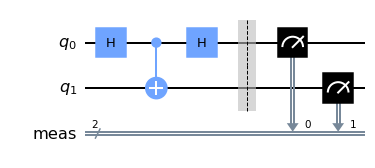

In [1]:
from qiskit import QuantumCircuit

bomb_tester = QuantumCircuit(2)
bomb_tester.h(0)
bomb_tester.cx(0, 1)
bomb_tester.h(0)
bomb_tester.measure_all()
bomb_tester.draw(output='mpl')

In [ ]:
print(bomb_tester.qasm())

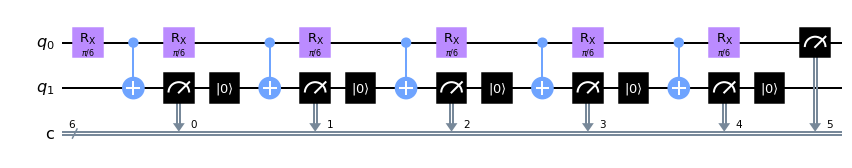

In [5]:
# Coding the Zeno bomb tester 

from qiskit.circuit import QuantumRegister, ClassicalRegister
import numpy as np
from qiskit.circuit.library import RXGate

cycles = 6 # Choose the number of times we want to pass our photon through the mystery box. The more, the better. 
theta = np.pi/cycles # The correct reflectivity of our beamsplitter is chosen for the quantum Zeno effect to work.

# Create our quantum circuit 
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(cycles, 'c')
zeno_tester = QuantumCircuit(qr, cr)

# Create a chain of our variable beamsplitters and C-NOT bombs 
for cycle in range(cycles-1):
    zeno_tester.append(RXGate(theta), [qr[0]])
    zeno_tester.cx(0, 1)
    zeno_tester.measure(qr[1],cr[cycle])
    zeno_tester.reset(qr[1])

# Add a final beamsplitter
zeno_tester.append(RXGate(theta), [qr[0]])

#Measure our photon to predict whether there is a bomb, and measure our bomb qubit to see if it exploded.    
zeno_tester.measure(qr[0],cr[cycles-1])
zeno_tester.draw(output='mpl')

In [6]:
print(zeno_tester.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[6];
rx(pi/6) q[0];
cx q[0],q[1];
measure q[1] -> c[0];
reset q[1];
rx(pi/6) q[0];
cx q[0],q[1];
measure q[1] -> c[1];
reset q[1];
rx(pi/6) q[0];
cx q[0],q[1];
measure q[1] -> c[2];
reset q[1];
rx(pi/6) q[0];
cx q[0],q[1];
measure q[1] -> c[3];
reset q[1];
rx(pi/6) q[0];
cx q[0],q[1];
measure q[1] -> c[4];
reset q[1];
rx(pi/6) q[0];
measure q[0] -> c[5];



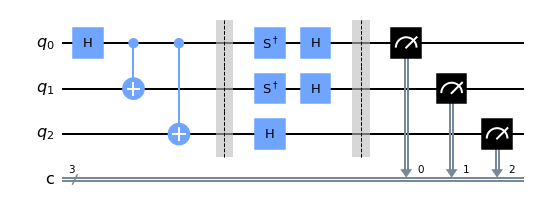

In [12]:
# basic circuit
n = 3
name = "GHZ yyx default" # ghz in measurement base Y,Y,X
ghz = QuantumCircuit(n,n, name=name) # create circuit
ghz.h(0) # h gate
ghz.cx(0,1) # cnot gate
ghz.cx(0,2) # cnot gate
ghz.barrier()
ghz.sdg([0,1]) # s dagger gate
ghz.h(range(n)) # h gates
ghz.barrier()
ghz.measure(range(n), range(n)) # measurements
ghz.draw("mpl") # draw cirucit

In [13]:
print(ghz.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
creg c[3];
h q[0];
cx q[0],q[1];
cx q[0],q[2];
barrier q[0],q[1],q[2];
sdg q[0];
sdg q[1];
h q[0];
h q[1];
h q[2];
barrier q[0],q[1],q[2];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];

